In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
titanic = pd.read_csv('/content/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass.1,Name.1,Sex.1,Age.1,SibSp.1,Parch.1,Ticket.1,Fare.1,Cabin.1,Embarked.1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S


In [ ]:
titanic.shape

(891, 23)

In [ ]:
#records missing in dataset
total=titanic.isnull().sum().sort_values(ascending=False)
total

Cabin.1          800
Cabin            687
Age.1            559
Fare.1           474
Embarked.1       473
Pclass.1         473
Ticket.1         473
Parch.1          473
SibSp.1          473
Sex.1            473
Name.1           473
PassengerId.1    473
Age              177
Embarked           2
Survived           0
Fare               0
Ticket             0
Parch              0
SibSp              0
Sex                0
Name               0
Pclass             0
PassengerId        0
dtype: int64

In [ ]:
#PERCENTAGE OF WOMEN SURVIVED
women = titanic.loc[titanic.Sex == 'female']['Survived']
rate_women =sum(women)/len(women)
print(str(rate_women) +"% of women who survived.")

0.7420382165605095% of women who survived.


In [ ]:
men = titanic.loc[titanic.Sex == 'male']['Survived']
rate_men =sum(men)/len(men)
print(str(rate_men) +"% of men who survived.")

0.18890814558058924% of men who survived.


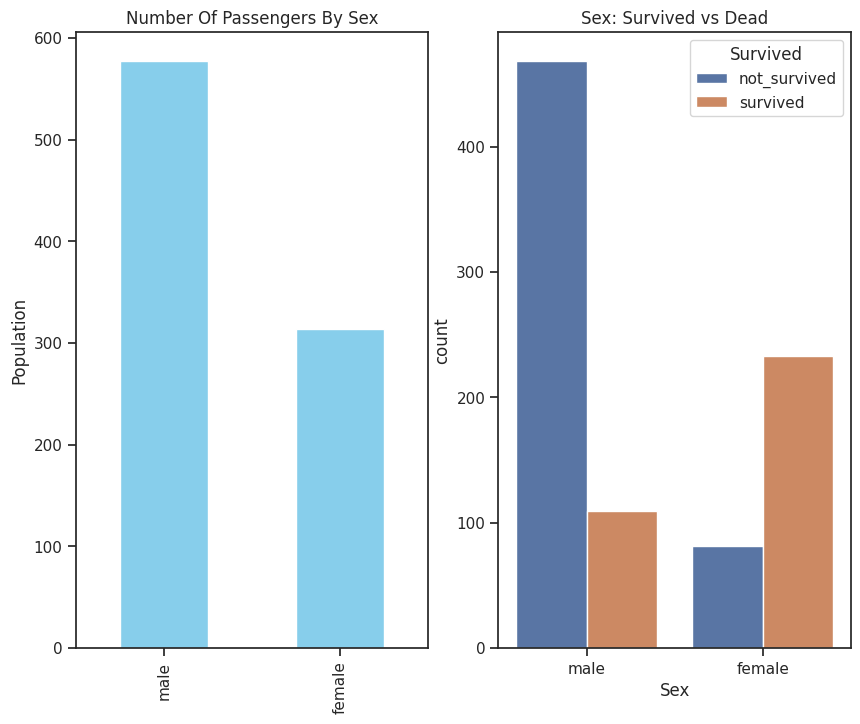

In [ ]:
titanic['Survived'] = titanic['Survived'].map({0: "not_survived", 1: "survived"})
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

titanic["Sex"].value_counts().plot.bar(color="skyblue", ax=ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("Population")

sns.countplot(x="Sex", hue="Survived", data=titanic, ax=ax[1])
ax[1].set_title("Sex: Survived vs Dead")

plt.show()


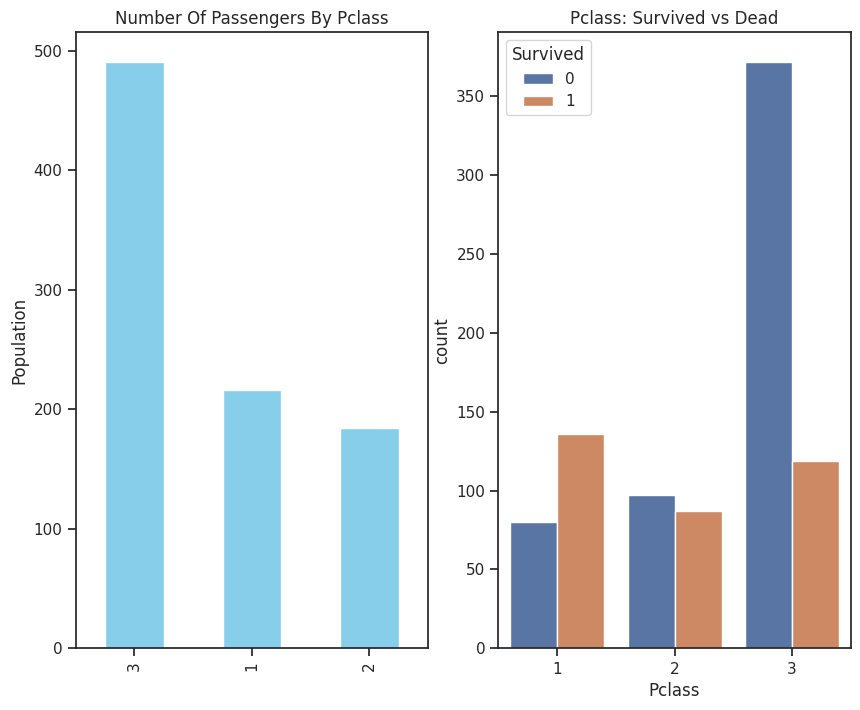

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10, 8))

titanic["Pclass"].value_counts().plot.bar(color="skyblue", ax=ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Population")

sns.countplot(x="Pclass", hue="Survived", data=titanic, ax=ax[1])
ax[1].set_title("Pclass: Survived vs Dead")

plt.show()


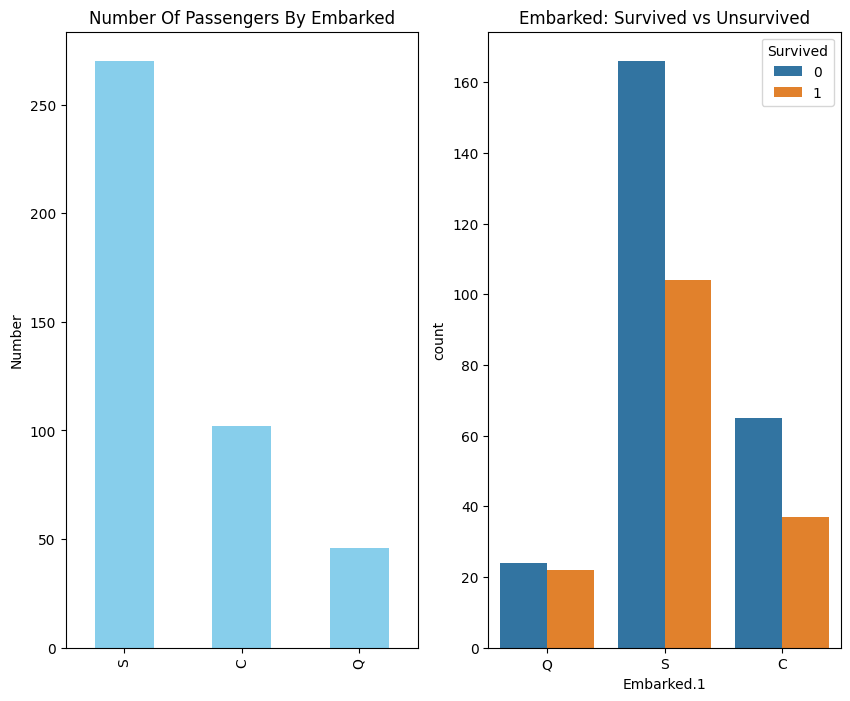

In [ ]:
#the number of survivors and deaths from different embarked:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'Embarked' column exists and is not empty
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
titanic["Embarked.1"].value_counts().plot.bar(color="skyblue", ax=ax[0])
ax[0].set_title("Number Of Passengers By Embarked")
ax[0].set_ylabel("Number")

sns.countplot(x="Embarked.1", hue="Survived", data=titanic, ax=ax[1])
ax[1].set_title("Embarked: Survived vs Unsurvived")

plt.show()



<ipython-input-22-ba8a25e844a8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'].dropna())


<Axes: xlabel='Age', ylabel='Density'>

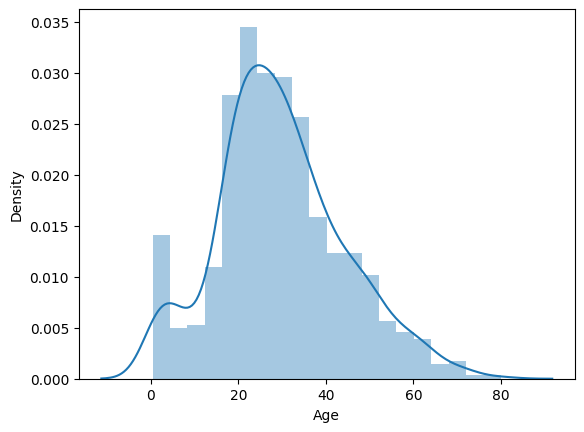

In [ ]:
# data cleaninig
sns.distplot(titanic['Age'].dropna())

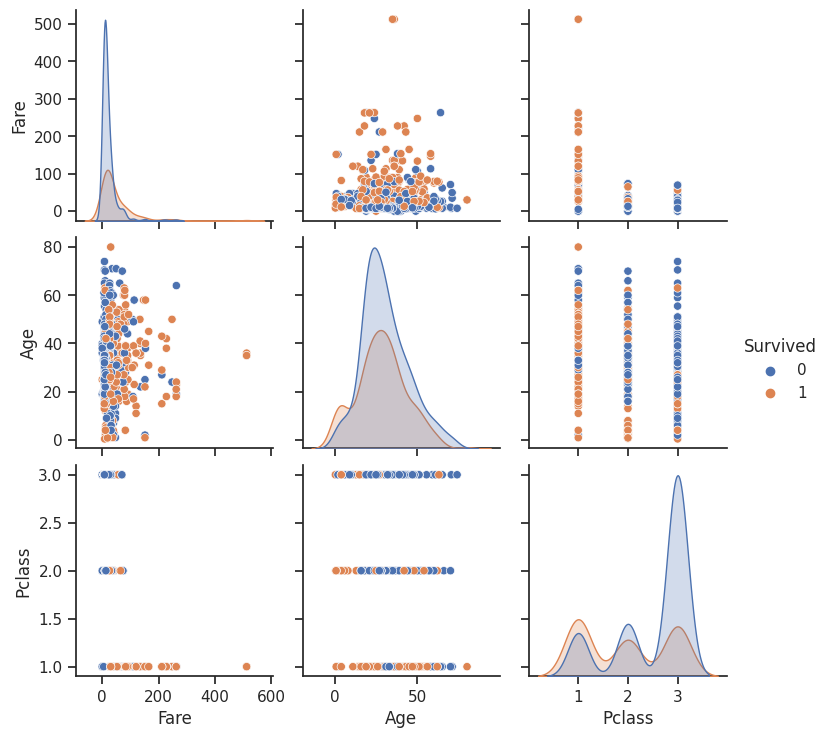

In [ ]:
#the Survived, Pclass, Fear, and Age variables:
sns.set(style="ticks", color_codes=True)
sns.pairplot(titanic,vars = ['Fare','Age','Pclass'],hue="Survived")
plt.show()

In [ ]:
#correlation table with a heatmap
titanic['Embarked'] = titanic['Embarked'].map({"S":1,"C":2,"Q":2,"NaN":0})
Tcorrelation = titanic.corr(method='pearson')
Tcorrelation

<ipython-input-42-8a2fd807c181>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Tcorrelation = titanic.corr(method='pearson')


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,PassengerId.1,Pclass.1,Age.1,SibSp.1,Parch.1,Fare.1
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.022269,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.076466,-0.079786,0.021804,-0.033915,0.001541,0.030579,0.015761
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.025431,0.024822,0.042819,0.029737,0.054178,0.044766,-0.052622
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.069438,-0.066531,-0.039738,-0.038473,-0.010949,0.029723,0.065632
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.061512,-0.042097,0.081052,-0.019576,0.146065,-0.015740,-0.019624
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,0.163758,0.083266,0.031003,-0.025249,-0.056752,-0.061935,-0.045061
Embarked,-0.022269,-0.076466,0.025431,-0.069438,-0.061512,0.163758,1.000000,0.007304,-0.026420,0.025676,0.033824,0.018376,-0.007800
PassengerId.1,1.000000,-0.079786,0.024822,-0.066531,-0.042097,0.083266,0.007304,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass.1,-0.026751,0.021804,0.042819,-0.039738,0.081052,0.031003,-0.026420,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age.1,-0.034102,-0.033915,0.029737,-0.038473,-0.019576,-0.025249,0.025676,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932


<Axes: xlabel='Survived', ylabel='count'>

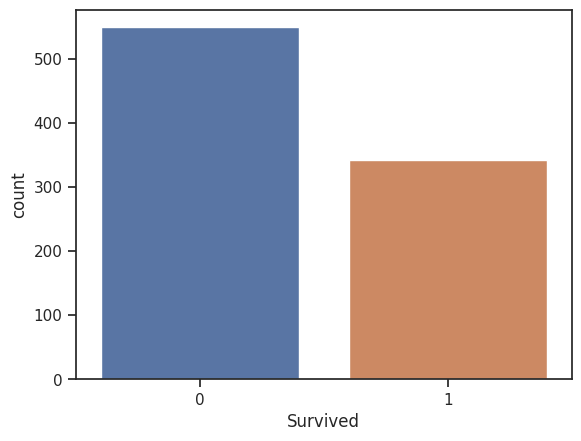

In [ ]:
sns.countplot(x='Survived', data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

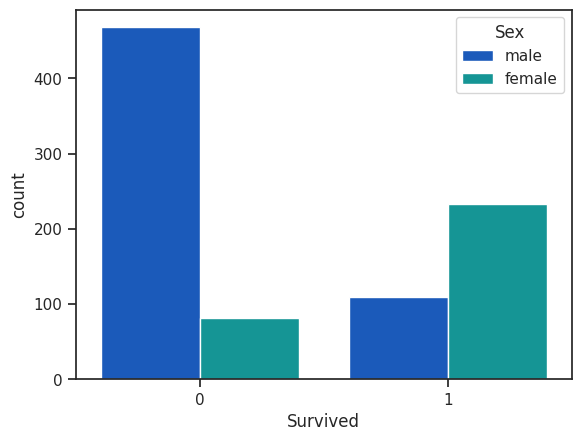

In [ ]:
sns.countplot(x='Survived', hue ='Sex', data=titanic, palette ='winter')


In [ ]:
import matplotlib as mpl
from colorsys import rgb_to_hls

red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)

rgb_colors = [red, green, blue]
light_vals = [rgb_to_hls(*c)[1] for c in rgb_colors]
lum = min(light_vals) * 0.6

# Normalize the luminance value to the 0-1 range
lum_normalized = lum / 255.0
gray = mpl.colors.rgb2hex((lum_normalized, lum_normalized, lum_normalized))

print("Gray color:", gray)


Gray color: #4c4c4c


<Axes: xlabel='Survived', ylabel='count'>

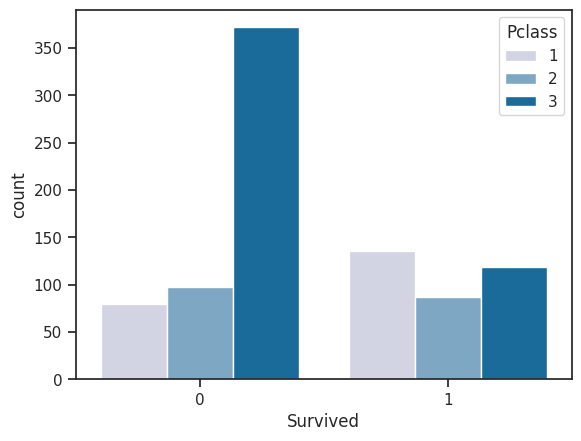

In [ ]:
sns.countplot(x="Survived", hue='Pclass', data=titanic, palette='PuBu')

<Axes: ylabel='Frequency'>

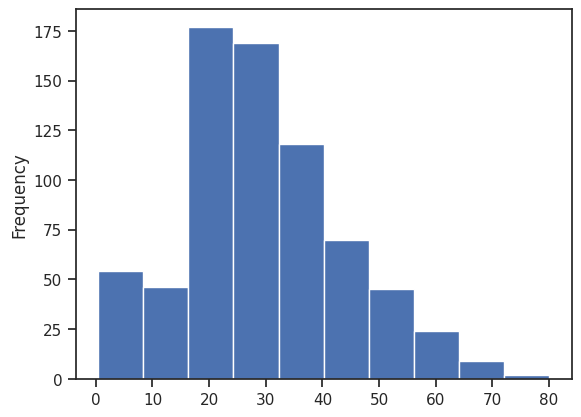

In [ ]:
titanic['Age'].plot.hist()

<Axes: xlabel='Parch', ylabel='count'>

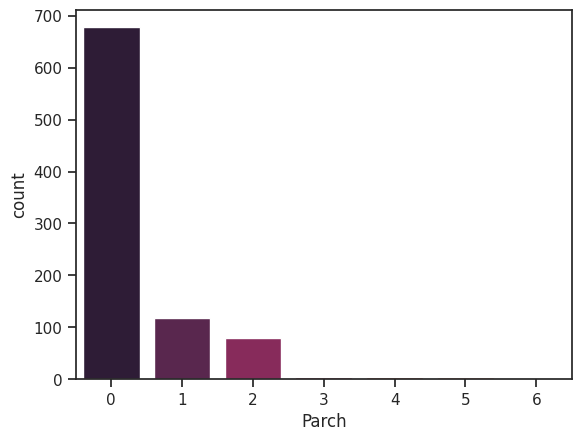

In [ ]:
sns.countplot(x='Parch', data=titanic, palette='rocket')

<Axes: >

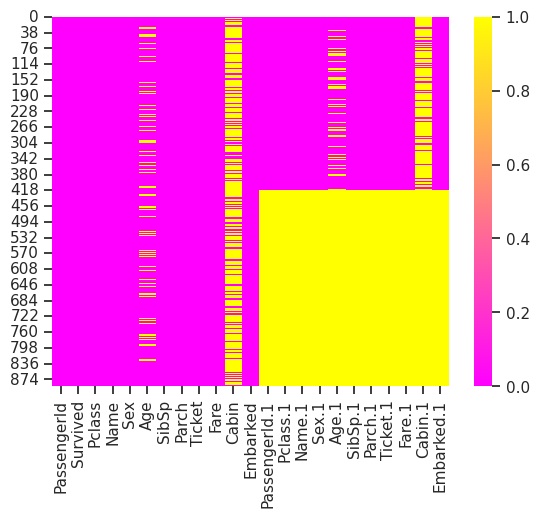

In [ ]:
sns.heatmap(titanic.isnull(), cmap='spring')


In [ ]:
pd.get_dummies(titanic['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
